#                     Exploratory Data Analysis

This notebook was intended to analyze the portfolio of insured clients that was shared with our team, after having estimated each client's resiliation probability based on individual features and rebate/surcharge interactions.

Each client's churn probability was fitted on historical data using a logistic regression.

In [ ]:
# package importations
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
os.chdir("### wd ###")

Dataset loading:

In [ ]:
contract_df = pd.read_csv("### path to the dataset ###")
contract_df = contract_df.set_index("id_police").dropna()
contract_df

,prime_profit,pcc,coeff_non_prix,coeff_prix,proba_resil_0%,proba_resil_5%
id_police,,,,,,
0,656.76,195.095040,-3.134886,0.030251,0.041691,0.048171
1,565.07,241.910668,-3.647255,0.028251,0.025401,0.029142
2,667.01,209.517653,-4.047125,0.007751,0.017172,0.017839
3,446.53,157.952262,-3.199612,0.011251,0.039180,0.041354
4,402.60,141.328265,-2.762014,0.010251,0.059412,0.062341
5,560.22,203.687056,-4.060793,0.015751,0.016943,0.018306
6,384.58,190.228731,-4.339055,0.001751,0.012881,0.012993
7,411.60,140.172988,-2.715471,0.016751,0.062067,0.067125
8,875.20,261.500800,-2.342503,0.024751,0.087664,0.098079


Almost 700K clients.

Engineered features for each customer covered:
- ```prime_profit```: premium paid by the insured customer to the insurer
- ```pcc```: cost of the insured client from the insurer's perspective
- ```coeff_prix```: aggregate of the rebate/surcharge-dependent coefficients of the fitted logistic regression
- ```coeff_non_prix```: aggregate of the rebate/surcharge-independent coefficients of the fitted logistic regression
- ```proba_resil_0%```: initial resiliation probability computed (as an example) for no surcharge on the new contract
- ```proba_resil_5%```: resiliation probability computed (as an example) for a 5% surcharge on the new contract

In [ ]:
# utility variable to compute histograms later on
n = int(np.sqrt(len(contract_df.index)))

## 1. ```prime_profit``` and ```pcc```

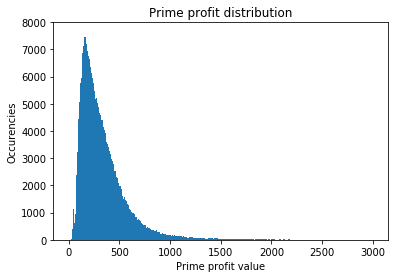

In [ ]:
# distribution of premiums paid by the customers
ax = contract_df["prime_profit"].hist(bins=n, grid=False, range=(0,3000))
plt.title("Prime profit distribution")
plt.xlabel("Prime profit value")
plt.ylabel("Occurences")
fig = ax.get_figure()
plt.show()

The ```prime_profit``` (i.e. revenue obtained from each customer) distribution looks like a log-normal one (or a khi-squared one): it is skewed, long-tailed, and asymmetric.

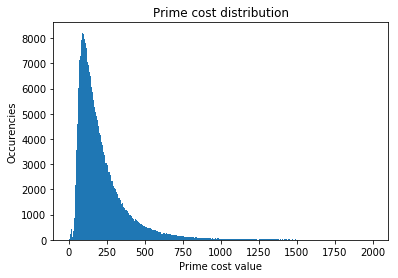

In [ ]:
# distribution of customer costs
ax = contract_df["pcc"].hist(bins=n, grid=False, range=(0,2000))
plt.title("Prime cost distribution")
plt.xlabel("Prime cost value")
plt.ylabel("Occurences")
fig = ax.get_figure()
plt.show()

The ```pcc``` (cost of each client for the insurer) distribution looks like a log-normal one (or a khi-squared one): it is skewed, long-tailed, and asymmetric. Its kurtosis seems lower than that of the prime profit distribution.

In [ ]:
# prime_profit stats
print(contract_df["prime_profit"].mean())
print(contract_df["prime_profit"].std())

343.9349406109429
289.81228253789436


In [ ]:
# pcc stats (customer cost in the eyes of the insurer, without "logistic" costs taken into account)
print(contract_df["pcc"].mean())
print(contract_df["pcc"].std())

220.20243614365725
188.45356447363147


On average, customers cost less than they bring in, but this does not take into account additional costs incurred by customers, such as paying the sales force, logistics,...
The standard deviation of premiums is also higher than that of the costs.

### Outlier analysis

In [ ]:
# some very profitable clients (10000 could have been found using quantiles of the prime_profit-pcc distribution)
contract_df[contract_df["prime_profit"]>10000+contract_df["pcc"]]

,prime_profit,pcc,coeff_non_prix,coeff_prix,proba_resil_0%,proba_resil_5%
id_police,,,,,,
5204,14493.15,4185.131957,-4.839457,0.019251,0.007849,0.008635
23074,10828.19,790.615282,-3.550927,0.017251,0.027897,0.030334
87597,36340.79,5624.557785,-4.259666,0.026251,0.013930,0.015853
350353,11604.27,1544.196174,-3.064788,0.016251,0.044583,0.048175
492436,16407.42,4810.077584,-3.471097,0.033251,0.030146,0.035405


There seem to be very profitable customers in the dataset, with high premium / cost ratio. And despite their high premium, these customers still have a low estimated resilience probability!

In [ ]:
# customers at a loss
len(contract_df[contract_df["pcc"]>contract_df["prime_profit"]])

69538

More than 10% of customers are at a loss before taking into account the ancillary costs!

## 2. Analysis of the estimated churn probability

### Visualizations of the previously fitted probability

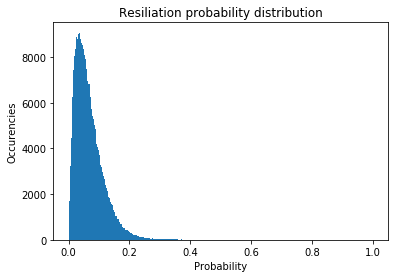

In [ ]:
# churn probability distribution with no rebate/surcharge imposed on the premium of each renewed contract
ax = contract_df["proba_resil_0%"].hist(bins=n, grid=False, range=(0,1))
plt.title("Resiliation probability distribution")
plt.xlabel("Probability")
plt.ylabel("Occurences")
fig = ax.get_figure()

plt.show()

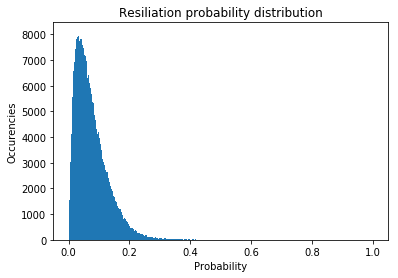

In [ ]:
# churn probability distribution with a 5% surcharge imposed on the premium of each renewed contract
ax = contract_df["proba_resil_5%"].hist(bins=n, grid=False, range=(0,1))
plt.title("Resiliation probability distribution")
plt.xlabel("Probability")
plt.ylabel("Occurencies")
fig = ax.get_figure()
plt.show()

In [ ]:
# average churn probability (over customers) with no surcharge on the premium of each renewed contract
contract_df["proba_resil_0%"].mean()

0.067613098547514

In [ ]:
# average churn probability (over customers) with a 5% surcharge on the premium of each renewed contract
contract_df["proba_resil_5%"].mean()

0.0756793866180868

Churn increases when the surcharge rate (same for everyone in the suboptimal analysis here) increases, which is consistent.
We also note that without a surcharge, the risk of churning is still significant for some customers (=> a rebate might be relevant in this case).

### Reminder: computation of the probability of resilitation

Since we trained a logistic regression to model the resiliation probability, we have:

resiliationProba(i) = exp(a(i)+b(i)delta(i))/(1+exp(a(i)+b(i)delta(i)))

with:
- i the id of a client
- a(i) the ```coeff_non_prix``` of client i
- b(i) the ```coeff_prix``` of client i
- delta(i) the rebate/surcharge coefficient we will choose for client i.




In [ ]:
# function to compute the resiliation probability of a customer (row) given a rebate/surcharge (delta) to impose
def getResiliationProba(row, delta):
    return 1/(1+np.exp(-row['coeff_non_prix']-100*delta*row['coeff_prix']))

## 3. Elasticity to premium increase

In [ ]:
# price elasticity = (churn_proba(delta) - churn_proba(0))) / delta
# function to compute the price elasticity of each customer all at once 
def buildElasticitySeries(contract_df, delta):
    resiliation_probas = contract_df.apply(getResiliationProba, args=(delta,), axis=1)/(1-contract_df.apply(getResiliationProba, args=(0,), axis=1))
    return resiliation_probas/delta

Text(0,0.5,'occurencies')

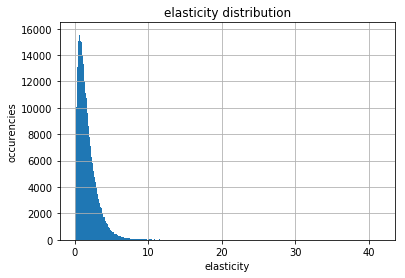

In [ ]:
# for this quick visualization, we set the premium surcharge to 5% for all customers and check how their likelihood of churning evolves
delta = 0.05  
elasticity = buildElasticitySeries(contract_df, delta)

ax = elasticity.hist(bins=n)
plt.title("elasticity distribution")
plt.xlabel("elasticity")
plt.ylabel("occurences")

In [ ]:
elasticity.mean()

1.6952585241929576

The average elasticity (over all customers) is close to 2% for a 5% premium increase on all renewed contracts

## 4. Profit analysis (```prime_profit``` - ```pcc```)

### analysis of the profit per client given a fixed surcharge

In [ ]:
# function to compute the profit made from each client given a fixed rebate/surcharge
def buildMarginSeries(contract_df, delta):
    resiliation_probas = contract_df.apply(getResiliationProba, args=(delta,), axis=1)
    indiv_margin = (contract_df["prime_profit"]*(1+delta)-contract_df["pcc"])*(1-resiliation_probas)
    return indiv_margin

Text(0.5,0,'invidual margin')

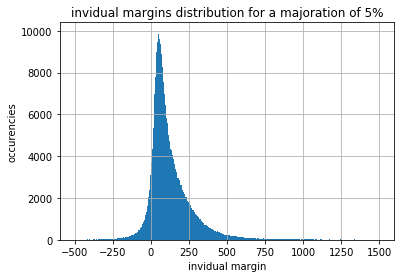

In [ ]:
delta = 0.05  # 5% premium increase imposed to all customers
margin = buildMarginSeries(contract_df, delta)

margin.hist(bins=n, range=(-500, 1500))
plt.title("invidual margins distribution for a majoration of 5%")
plt.ylabel("occurences")
plt.xlabel("invidual margin")

We notice that some of the per-client profits are negative (for the customers at a loss) and that the tail of the high profits is pretty thick.

### aggregated profit analysis (over the whole portfolio)

In [ ]:
# function to compute the aggregated profit depending on a fixed rebate/surcharge coefficient applied to all clients (no personalization)
def buildMarginAndRetentionEvolutionOverMajorationList(contract_df, sample_size, delta_list, min_proba_res):
    margin_list = []
    proba_retention_list = []
    
    # df = contract_df.sample(n=sample_size)
    df = contract_df[contract_df['proba_resil_0%'] > min_proba_res]
    # we extract a subpopulation of clients with a churn probability already high initially to better illustrate the effect of a future surcharge
    
    print(str(len(df))+" contract found for a min proba of resiliation of "+str(min_proba_res)+"\n")
    
    for delta in delta_list:
        resiliation_probas = df.apply(getResiliationProba, args=(delta,), axis=1)
        print(resiliation_probas)
        
        margin = ((df["prime_profit"]*(1+delta)-df["pcc"])*(1-resiliation_probas)).sum()
        margin_list.append(margin)
        
        proba_retention = (1-resiliation_probas).sum()/len(resiliation_probas.index)
        proba_retention_list.append(proba_retention)
        
        print("Done for a majoration rate of "+str(delta*100)+"%\n")
        
    return margin_list, proba_retention_list

In [ ]:
# we fix the arguments of the function, and compute the profits (=margin) and average retention probabilities depending on the rebate/surcharge delta
delta_list = list(np.arange(-0.2,1.2,0.02)) # we span rebate/surcharges from -20% to +120%
sample_size = 1
min_proba_res = 0.1
margin_list, proba_retention_list = buildMarginAndRetentionEvolutionOverMajorationList(contract_df, sample_size, delta_list, min_proba_res)

Text(0.5,0,'majoration')

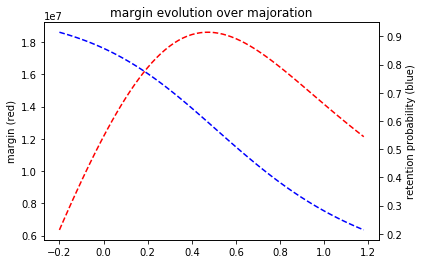

In [ ]:
# we plot a graph of the evolution of the average retention probability and total profit over the rebate/surcharge coefficient applied to all clients
fig, ax = plt.subplots()
plt.plot(delta_list, margin_list, '--r', label='margin')
ax.tick_params('vals', colors='r')
#ax.legend(loc='upper left')
plt.ylabel("margin (red)")

# Get second axis
ax2 = ax.twinx()
plt.plot(delta_list, proba_retention_list, '--b', label='retention proba')
ax.tick_params('vals', colors='b')
#ax.legend(loc='lower right')
plt.ylabel("retention probability (blue)")

plt.title("margin evolution over majoration")
plt.xlabel("majoration")